In [50]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [30]:
def pareto_frontier(Xs, Ys, maxX = False, maxY = False):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

In [117]:
# open log file
with open("outputs/saved/simple_2_fpgaconvnet.csv","r") as f:
    reader = csv.reader(f, delimiter=',')
    log = [ [ int(float(row[0])), int(row[1]), int(row[2]), int(row[3]), int(row[4]), True if row[5] == "True" else False ] for row in reader ] 
    
# get latency and resources
latency = [ row[0] for row in log ]
resource = [ 0.25*row[1]/2160 + 0.25*row[2]/2760 + 0.25*row[3]/663360 + 0.25*row[4]/331680 for row in log]

latency_chosen = []
resource_chosen = []
for row in log:
    if row[-1]:
        latency_chosen += [row[0]]
        resource_chosen += [0.25*row[1]/2160 + 0.25*row[2]/2760 + 0.25*row[3]/663360 + 0.25*row[4]/331680]

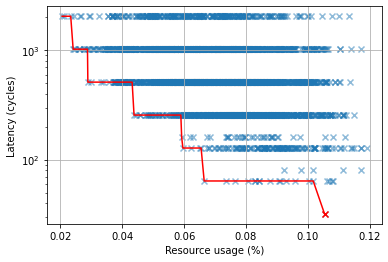

In [118]:
# plot pareto-optimal front
pareto_front = pareto_frontier(resource, latency)
plt.scatter(resource, latency, marker="x", alpha=0.5)
plt.plot(*pareto_front, color="r")
plt.scatter(resource_chosen[-1], latency_chosen[-1], color="r", marker="x")
plt.yscale("log")
plt.grid()
plt.ylabel("Latency (cycles)")
plt.xlabel("Resource usage (%)")
plt.show()



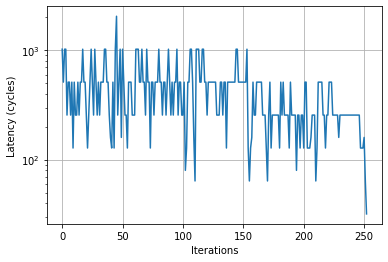

In [119]:
plt.plot(np.arange(len(latency_chosen)), latency_chosen)
plt.yscale("log")
plt.ylabel("Latency (cycles)")
plt.xlabel("Iterations")
plt.grid()
plt.show()